**Объектно-ориентированное программирование**

**1) Концепция класса и объекта. Принципы и механизмы ООП:**

- Структура, объединяющая свойства и методы, называется **класс**.
- В биологии каждое живое существо относят к определённому классу: птицы, рыбы, земноводные. Собака Жучка — это экземпляр класса «млекопитающие».
В программировании экземпляры класса иначе называют **объекты**. Класс подобен чертежу автомобиля, а объект — это ваша машина, созданная по этому чертежу.
- Способ, которым вы обращаетесь к свойствам и методам объекта — **интерфейс**.
- Одинаковые структуры часто требуют одинаковой обработки, и потому функции-обработчики включены в состав этих структур. Такие функции называются **методы**.

**Важные термины: (принципы ООП)**
- **Интерфейс класса** — это функциональная часть класса, через которую происходит взаимодействие с самим классом или с экземпляром этого класса.

- **Наследование** — способ описать новый класс на базе существующего. При этом в дочернем классе можно сохранить или переопределить свойства и методы родительского класса.

- **Инкапсуляция** — объединение и скрытие методов и свойств, и предоставление доступа к ним через простой внешний интерфейс.

Даже не имея понятия, как работают методы lower, upper или split объекта типа str, мы из документации знаем о них и можем управлять объектом. Методы «инкапсулированы», а разработчику предоставлен интерфейс для их вызова: string.upper() А класс Parrot инкапсулирует свойства попугая name, size, sound, и его метод show(): совершенно необязательно знать, как они работают, можно просто обратиться к ним и получить результат: ara.show()

- **Полиморфизм** — возможность взаимодействовать с объектами разных типов через одинаковые интерфейсы, обращаться к свойствам и методам, общим для всех объектов.


**2) Объявление класса, конструктор, создание объектов и одиночное наследование в Python. Управление доступом к атрибутам класса в Python:**

- Для создания новых классов существует ключевое слово class.
- После него указывается имя этого класса. Дальше описывают метод с именем __init__, это специальная функция для создания объектов — конструктор класса. Он вызывается автоматически при создании нового объекта и сохраняет полученные значения в этом объекте.
Синтаксис описания класса выглядит так:

In [1]:
class Contact:
    def __init__(self, name, phone, birthday):
        self.name = name
        self.phone = phone
        self.birthday = birthday

        # После создания объекта сообщим об этом
        print(f'Создан новый контакт: "{name}"')

    # Создадим метод show для вывода на печать данных любого контакта:
    def show(self):
        print(f'Имя: {self.name}, '
              f'телефон: {self.phone}, '
              f'день рождения: {self.birthday}')


# теперь можно создать объект класса Contact, передав в конструктор значения:
ivan = Contact(name='Иван', phone='+155512345', birthday='2.12.1985')

# а можно использовать сокращённый синтаксис:
maria = Contact('Марья', '+277734567', '4.04.1999')

# вызовем метод show() для объекта ivan:
ivan.show()
# будет напечатано: "Имя: Иван, телефон: +155512345, день рождения: 2.12.1985" 

Создан новый контакт: "Иван"
Создан новый контакт: "Марья"
Имя: Иван, телефон: +155512345, день рождения: 2.12.1985


- Гибкость объектно-ориентированного программирования проявляется в **наследовании**. 
- Так называют возможность на основе существующих классов создавать классы-наследники, изменяя свойства и методы родительских классов, и добавляя новые.
Наследование организует иерархическую структуру проекта. Разработчик определяет классу-родителю основные свойства и методы, к которым можно обращаться в объектах любого из дочерних классов.

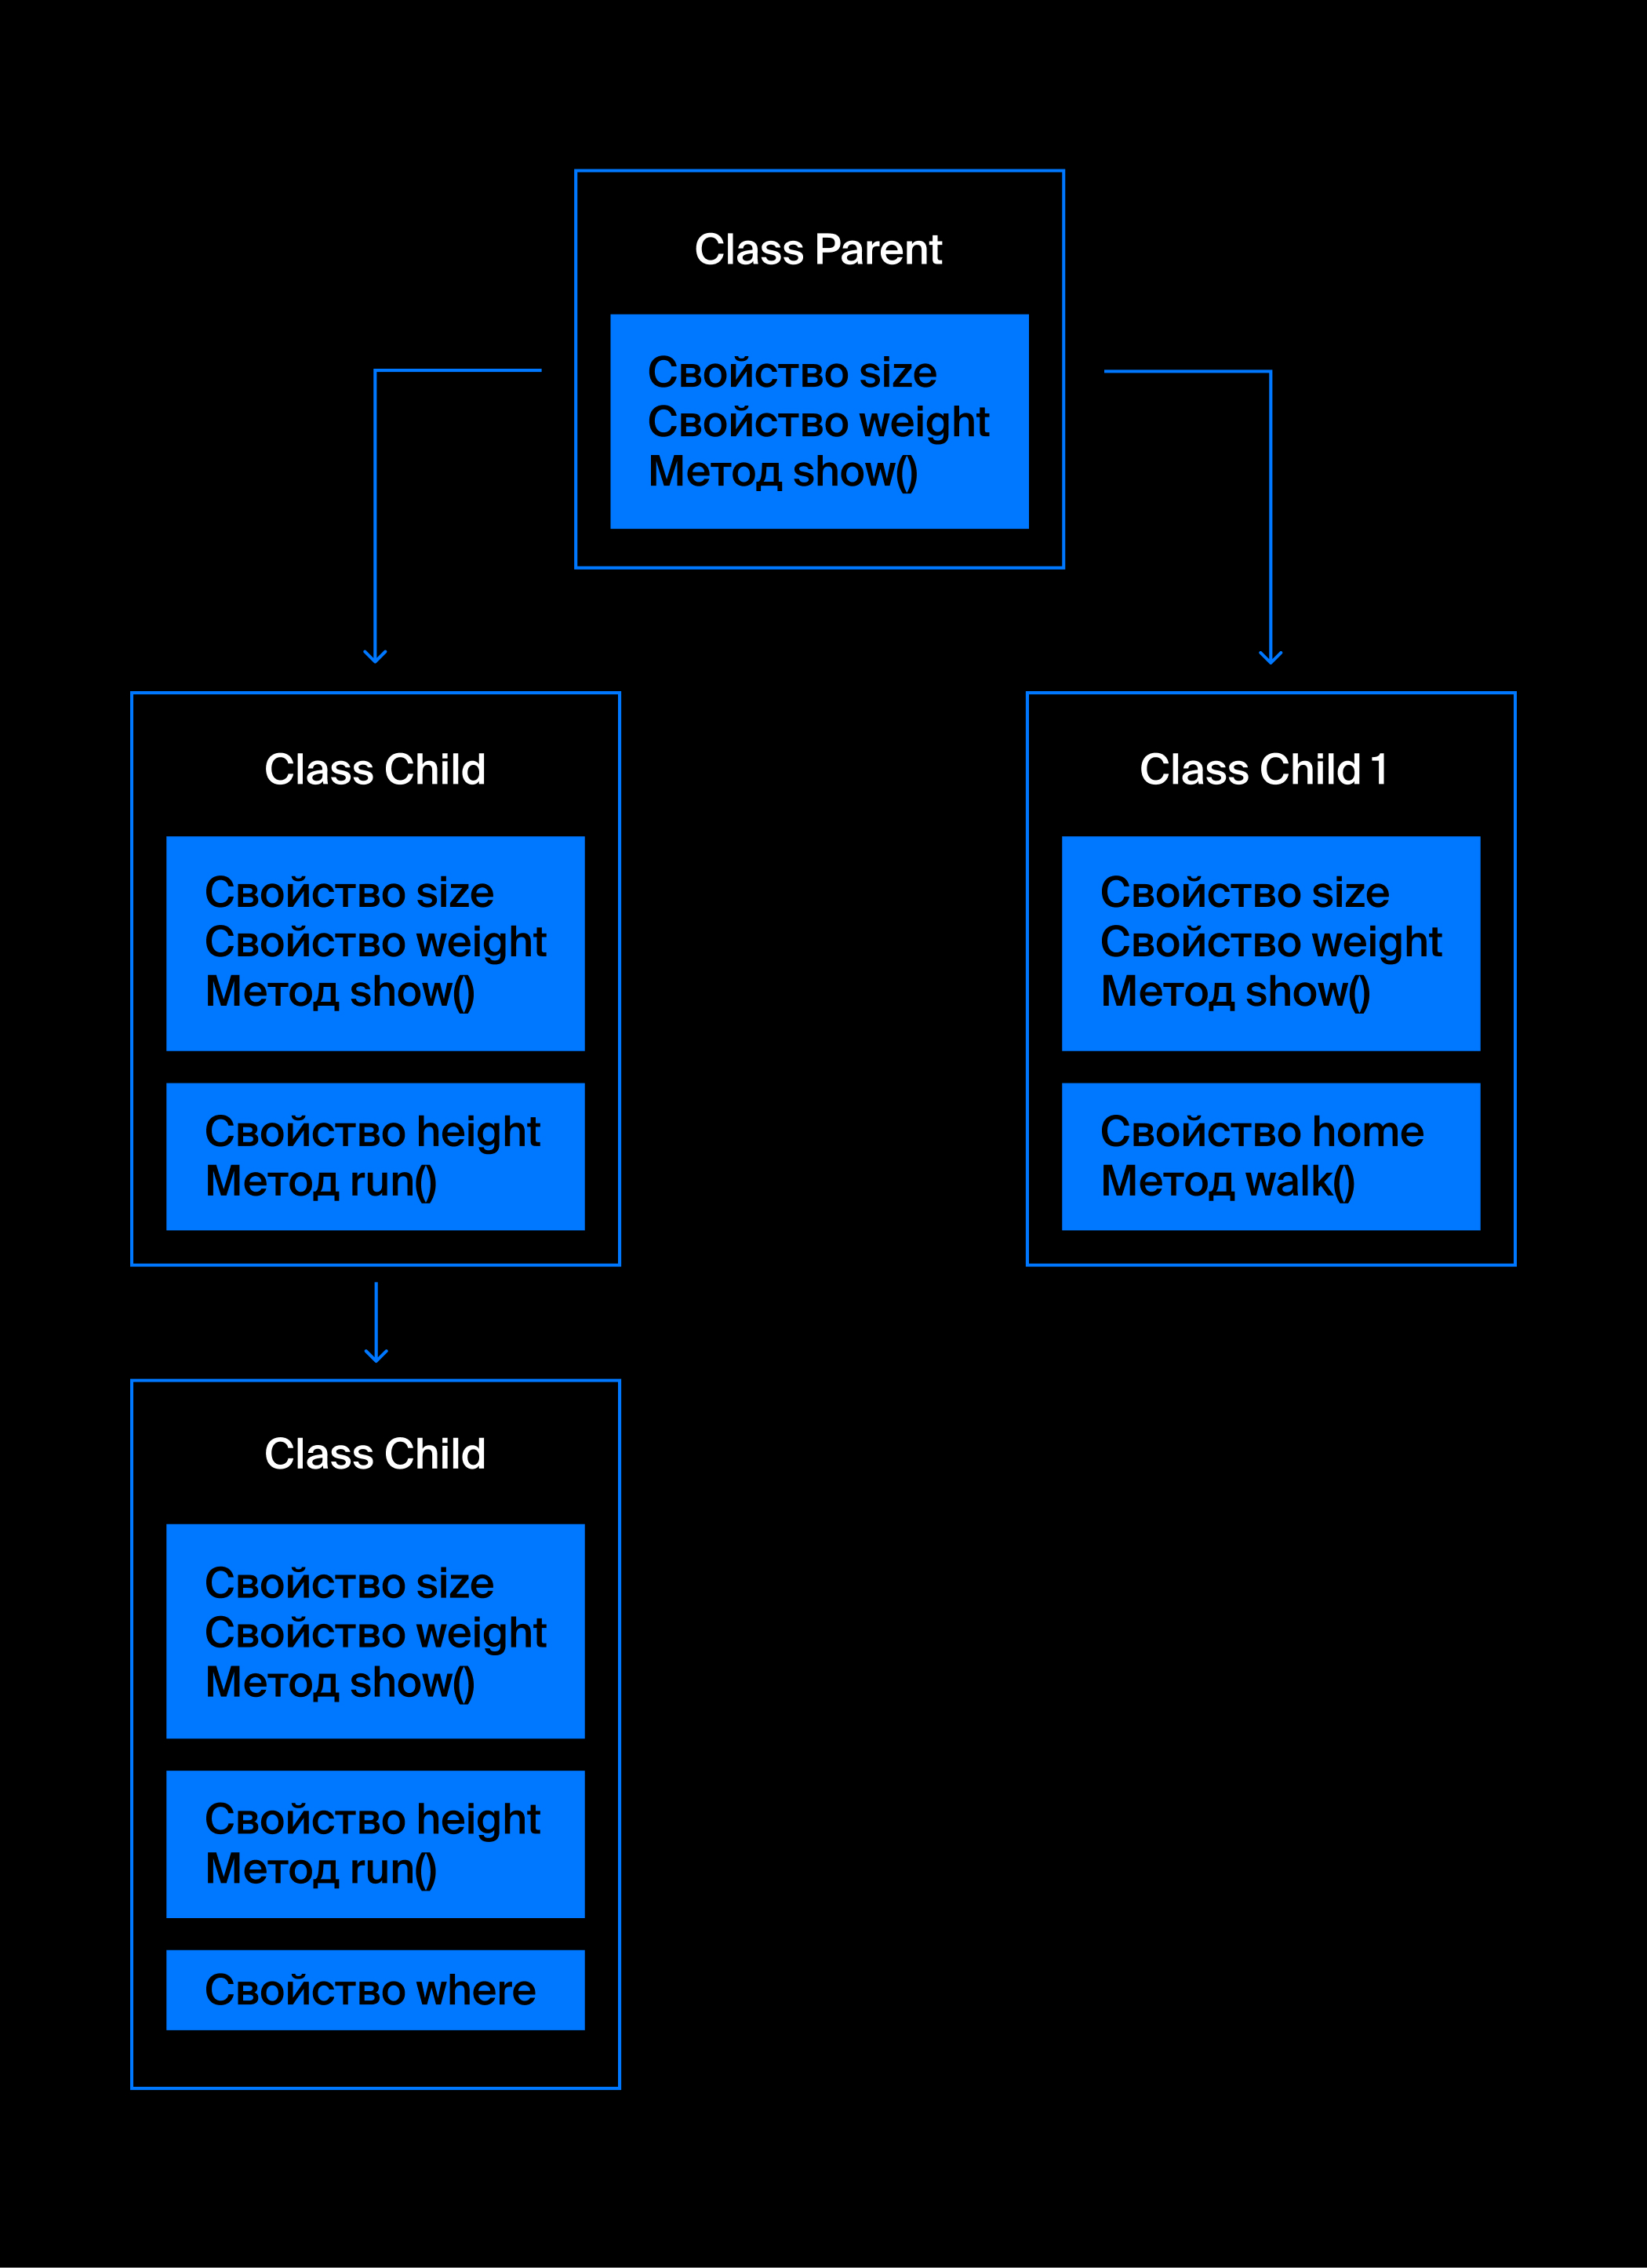

- Синтаксис наследования в Python выглядит так:

In [4]:
class User:
    def __init__(self, name, phone):
        self.name = name
        self.phone = phone

    def show(self):
        print(f'{self.name} ({self.phone})')


# объявляем класс Friend, дочерний по отношению к классу User
class Friend(User):
    def show(self):
        print(f'Имя: {self.name} || Телефон: {self.phone}')


# создаём объекты User и Friend
father = User('Дюма-отец', '+33 3 23 96 23 30')
son = Friend('Дюма-сын', '+33 3 23 96 23 30') 

# вызываем метод show() класса User (родительского)
father.show()
# результат: 
# Дюма-отец (+33 3 23 96 23 30)

# вызываем метод show() класса Friend (дочернего)
son.show() 
# результат выглядит иначе, чем у объекта User: 
# Имя: Дюма-сын || Телефон: +33 3 23 96 23 30 

Дюма-отец (+33 3 23 96 23 30)
Имя: Дюма-сын || Телефон: +33 3 23 96 23 30


- Класс User — родительский для класса Friend. Все свойства и методы родительского класса наследуются: в объектах класса Friend мы можем обращаться к свойствам name и phone, а также вызывать метод show().
- Но в классе Friend метод show сработает иначе, чем в классе User: этот метод был переопределён, описан заново, и данные на экран выведутся в другом формате.

Отношения между двумя этими классами принято описывать так:
- User является родительским классом для Friend;
- Friend является дочерним классом для User, или Friend наследуется от User.

Предположим, в объектах класса Friend вы хотите сохранять не только имя и телефон, но и адрес.
Значит, при создании экземпляра класса Friend нужно передавать параметр address. 
Но конструктор родительского класса принимает только name и phone.
- В этом случае поможет переопределение родительского конструктора, функции __init__.

In [8]:
class User:
    def __init__(self, name, phone):
        self.name = name
        self.phone = phone

    def show(self):
        print(f'{self.name} ({self.phone})')


# наследуем класс Friend от User
class Friend(User):
    # Пишем конструктор класса-наследника,
    # чтобы он принимал все нужные параметры
    def __init__(self, name, phone, address):
        # наследуем функциональность конструктора из класса-родителя
        super().__init__(name, phone)
        # добавляем новую функциональность: свойство address
        self.address = address

    # полностью переопределяем родительский метод show()
    def show(self):
        print(f'Имя: {self.name} || '
              f'Телефон: {self.phone} || '
              f'Адрес: {self.address}') 

first = Friend('Vasya', '12345', 'address')
first.show()

Имя: Vasya || Телефон: 12345 || Адрес: address


- Механизм наследования прозрачен: если функция или свойство родительского класса ещё раз описаны в дочернем классе, то этот метод или это свойство будут переопределены. А остальные свойства и методы будут работать точно так же, как у класса-родителя.

**3) Полиморфизм и утиная типизация и проверка принадлежности объекта к классу в языке Python.**

- **Полиморфизм** — возможность взаимодействовать с объектами разных типов через одинаковые интерфейсы, обращаться к свойствам и методам, общим для всех объектов.

В примере с птичками от класса Bird наследуются классы Parrot и Predator, а от Predator наследуется класс Egg.
К какому бы наследнику класса Bird мы ни обратились через интерфейсы name или show() — мы получим ответ (или, как минимум, не получим ошибку), потому что мы предусмотрительно реализовали принцип полиморфизма: у всех наследников класса Bird есть эти интерфейсы.

In [9]:
class Bird:
    def __init__(self, name, size):
        self.name = name
        self.size = size

    def show(self):
        print(f'{self.name} носит одежду размера {self.size}.')


class Parrot(Bird):
    def __init__(self, name, size, sound):
        super().__init__(name, size)
        self.sound = sound

    def show(self):
        print(f'{self.name} носит одежду размера {self.size} и {self.sound}.')


class Predator(Bird):
    def __init__(self, name, size, claws_size):
        super().__init__(name, size)
        self.claws_size = claws_size

    def show(self):
        print(f'{self.name} носит одежду размера {self.size} и '
              f'когти размера {self.claws_size}.')


class Egg(Predator):
    def show(self):
        print(f'Из яйца вылупится птичка {self.name} размера {self.size} с '
              f'когтями размера {self.claws_size}.') 

**Утиная типизация:**



In [14]:
class Car:
    """Базовый класс для автомобилей"""
    def __init__(self, x): # конструктор класса, используется для инициализации нового объекта
        self.x = x # создаем аттрибут класса        
        
    # метод класса; все методы класса должны в качестве первого атрибута иметь переменную self,
    # в которую автоматически передается ссылка на текущий объект 
    def is_near(self, x2): 
        return abs(self.x - x2) < 2.0 # self.x - обращение к атрибуту класса
    

# создаем объект, при создании передаем параметр конструктора:
c_1 = Car(3.1)
print(type(c_1))
c_2 = Car(7.1)
print(c_1.is_near(c_2.x))

<class '__main__.Car'>
False


In [15]:
class CargoCar(Car): 
    def __init__(self, x, max_load, load):
        self.x = x
        self.max_load = max_load
        self.load = load
    
    def is_overloaded(self):
        return self.load > self.max_load
    
cc_1 = CargoCar(6.0, 10, 2)
cc_1.is_near(7.9) # метод унаследован у Car

True

In [16]:
class CargoCarWithTrailer(CargoCar): 
    def __init__(self, x, max_load, load, trailer_length):
        super().__init__(x, max_load, load) # способ исползьовать реализацию конструктора базового класса
        self.trailer_length = trailer_length
    
    def is_near(self, x2): # перегруженный метод
        return self.x-self.trailer_length-2.0 < x2 < self.x+2.0    
    
    def is_near_old(self, x2):
        return super().is_near(x2) # способ обратиться к реализации функции в родительском классе
    
ccwt_1 = CargoCarWithTrailer(6.0, 10, 2, trailer_length=3)

In [18]:
class Man(object):
    def __init__(self, name, position): 
        self.name = name
        self.position = position
    
    def is_near(self, pos2): # метод класса
        return abs(self.position - pos2) < 1.0

m_1 = Man('Ivan', 9.5)

In [19]:
different_objects = [c_1, cc_1, c_2, ccwt_1, m_1]

In [20]:
# Благодаря поддержке утиной типизации в Python объекты, представляющие неродственные классы, 
# но реализующие необходимый функционал, могут обрабатываться единообразно:
for ob in different_objects:
    print(ob.is_near(6.2))

False
True
True
True
False
